# Predicting the leaving probabilities of customers leaving the bank using Artificial Neural Networks

## Description of the data: 
This is the data set of the bank which contains different features of 10,000 customer and whether they exited the bank or not. We have to look into the data set for them and give them some insights as to why the customers are leaving at unusually high rates.
## Data Cleaning
* Data was well structured
## Exploratory data analysis 
* It was found that the leaving rate of customers was higher in france, as compared to other countries
* Customers having credit cards are more likely to exit the bank
* Aged customers are more likely to leave the bank
* Exit ratio is equally distributed among the salaries
##  Preparing the data

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Churn_Modelling.csv")

df

# RowNumber and CustomerId are irrelevent features

In [ ]:
df.drop(["RowNumber", "CustomerId"], axis = 1, inplace = True)
df.head()

plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), cmap= "viridis")

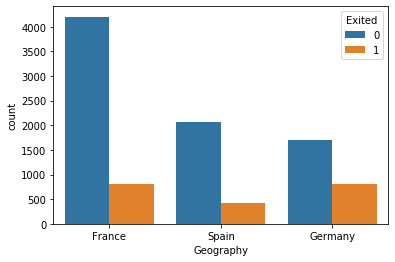

In [9]:
sns.countplot(df.Geography, hue=df.Exited)


# Seems germany have a higest dropout rates and France has lowest


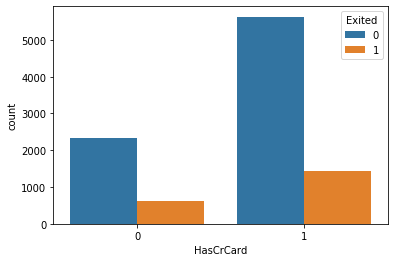

In [10]:
sns.countplot(df.HasCrCard, hue=df.Exited)

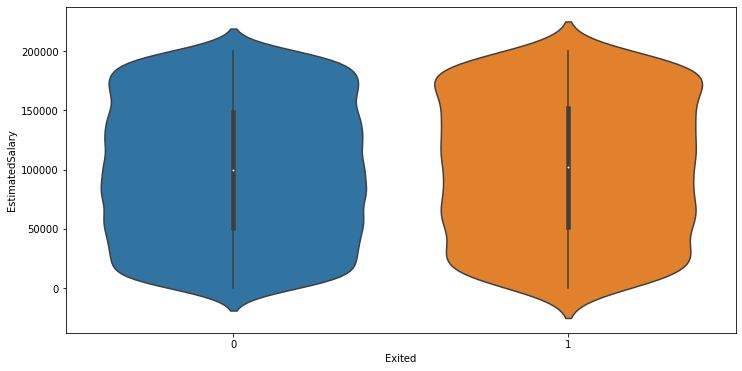

In [11]:
plt.figure(figsize= (12,6))
sns.violinplot(x = df.Exited, y = df.EstimatedSalary)

# It shows that across the range of estimated Salaries, the probability of dropouts is same

In [12]:
X = df.drop([ "Surname", "Exited" ], axis=1).values
y = df.Exited.values
print(X,y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]] [1 0 1 ... 1 1 0]


# Analyse our data using Excel Plugin

In [13]:
import xlwings as xw


churn = xw.Book()

ws = churn.sheets.add()
ws.range('A1').value = df

# The excel pop up kinda looks like this

In [18]:
from IPython.display import Image

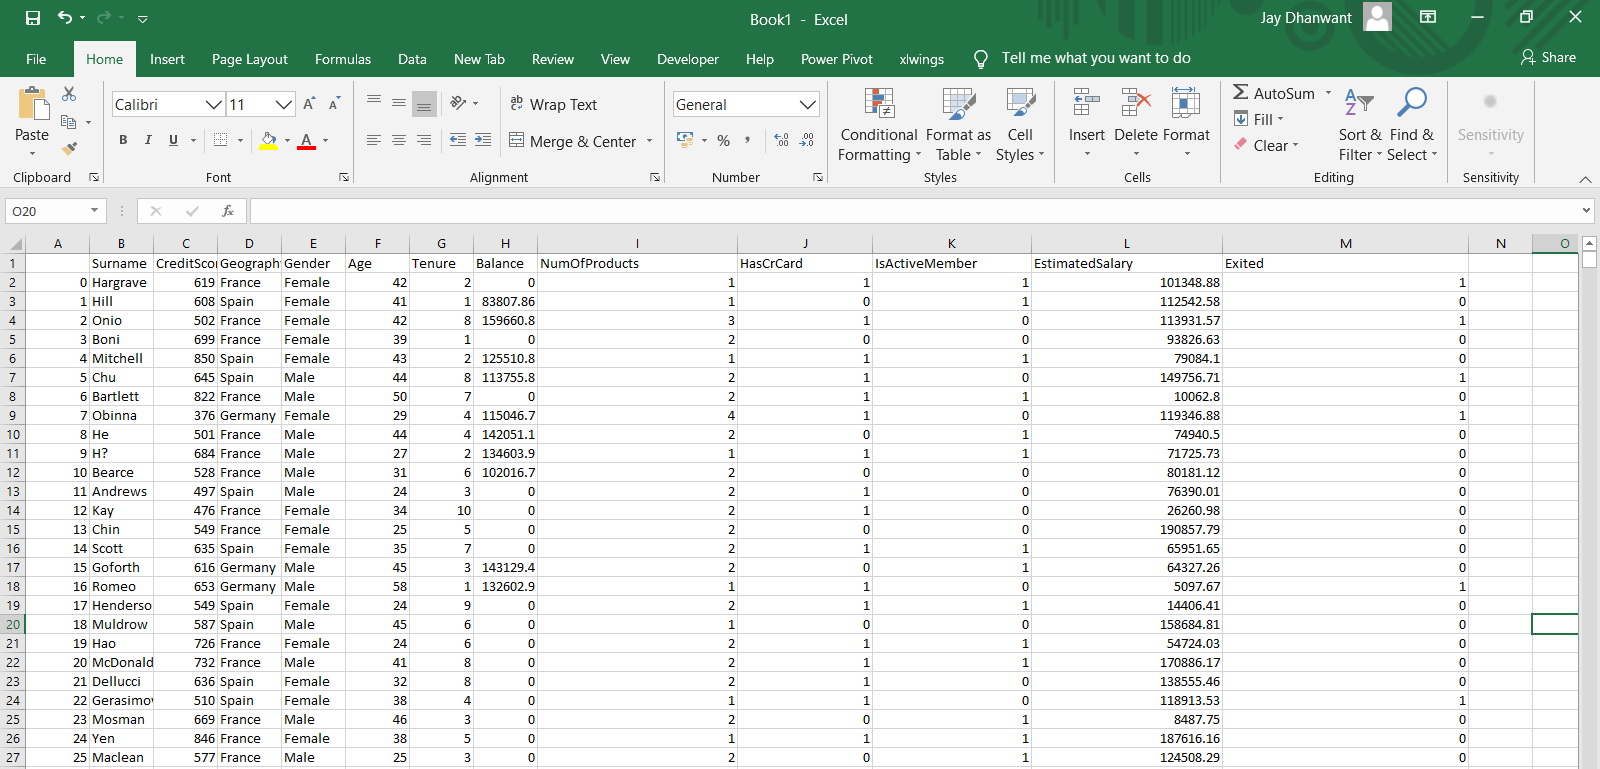

In [19]:
Image(filename = "xlpopup.png")

In [20]:
X = df.drop([ "Surname", "Exited" ], axis=1).values
y = df.Exited.values
print(X,y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]] [1 0 1 ... 1 1 0]


# Encoding categorical variables

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

These are the columns that needs to be encoded

In [22]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

Column with index 1 and 2 needs to be encoded

In [23]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()

In [24]:
X[:,1] =  label_encoder1.fit_transform(X[:,1])
X[:,2] =  label_encoder2.fit_transform(X[:,2])

In [25]:
X[:,1] # HAS THREE UNIQUE VALUES, THEREFORE IT NEEDS TO BE ONE HOT ENCODED

array([0, 2, 0, ..., 0, 1, 0], dtype=object)

In [26]:
ohe = OneHotEncoder(categorical_features=[1])

In [27]:
X = ohe.fit_transform(X).toarray()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [28]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [29]:
X = X[:, 1:]

# Creating the test data

In [30]:



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
print(X,y)

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 0.0000000e+00 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]] [1 0 1 ... 1 1 0]


# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
X_train

array([[ 1.74875572, -0.57987798,  1.67588802, ..., -1.54618507,
        -1.03555714,  1.50493673],
       [ 1.74875572, -0.57987798,  0.30320673, ...,  0.64675311,
         0.96566376, -1.31177144],
       [ 1.74875572, -0.57987798, -0.10235819, ...,  0.64675311,
        -1.03555714, -1.32081469],
       ...,
       [-0.57183516, -0.57987798,  0.86475817, ..., -1.54618507,
        -1.03555714, -0.15299072],
       [-0.57183516, -0.57987798,  0.15761932, ...,  0.64675311,
        -1.03555714, -0.06143595],
       [ 1.74875572, -0.57987798,  0.46959234, ...,  0.64675311,
         0.96566376, -0.82198396]])

# Now Data is preprocessed

# Making the Deep Learning Classifier

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [35]:
classifier = Sequential()

In [36]:
X_train.shape

(6700, 11)

In [37]:
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
training = classifier.fit(X_train, y_train, epochs=100, batch_size=10, validation_data = (X_test, y_test))

Train on 6700 samples, validate on 3300 samples
Epoch 1/100
6700/6700 [==============================] - 3s 411us/sample - loss: 0.3339 - accuracy: 0.8646 - val_loss: 0.3309 - val_accuracy: 0.8682
Epoch 2/100
6700/6700 [==============================] - 3s 411us/sample - loss: 0.3344 - accuracy: 0.8661 - val_loss: 0.3290 - val_accuracy: 0.8706
Epoch 3/100
6700/6700 [==============================] - 3s 384us/sample - loss: 0.3346 - accuracy: 0.8667 - val_loss: 0.3283 - val_accuracy: 0.8709
Epoch 4/100
6700/6700 [==============================] - 3s 376us/sample - loss: 0.3340 - accuracy: 0.8663 - val_loss: 0.3326 - val_accuracy: 0.8682
Epoch 5/100
6700/6700 [==============================] - 3s 401us/sample - loss: 0.3342 - accuracy: 0.8657 - val_loss: 0.3295 - val_accuracy: 0.8697
Epoch 6/100
6700/6700 [==============================] - 3s 488us/sample - loss: 0.3343 - accuracy: 0.8661 - val_loss: 0.3286 - val_accuracy: 0.8700
Epoch 7/100
6700/6700 [==============================] - 3

# We got an accuracy of 87 percent right of the bat

In [55]:
predictions = classifier.predict(X_test)

In [56]:
y_pred = predictions > 0.5

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_pred, y_test)

array([[2556,  331],
       [ 101,  312]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2657
           1       0.76      0.49      0.59       643

    accuracy                           0.87      3300
   macro avg       0.82      0.72      0.76      3300
weighted avg       0.86      0.87      0.86      3300



In [60]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [61]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

# Using cross_val score to have a better estimate of bias and variance. Cross_val_score lets it use all of the available gpu

In [ ]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)        
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [70]:
accuracies.mean()

0.8382089555263519

In [73]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout( rate = 0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
classifier.fit(x = X_train,y =  y_train, epochs = 100, batch_size= 10, validation_data= (X_test, y_test))

Train on 6700 samples, validate on 3300 samples
Epoch 1/100
6700/6700 [==============================] - 2s 354us/sample - loss: 0.5164 - accuracy: 0.7913 - val_loss: 0.4240 - val_accuracy: 0.8052
Epoch 2/100
6700/6700 [==============================] - 2s 248us/sample - loss: 0.4490 - accuracy: 0.7919 - val_loss: 0.4164 - val_accuracy: 0.8052
Epoch 3/100
6700/6700 [==============================] - 2s 242us/sample - loss: 0.4431 - accuracy: 0.7919 - val_loss: 0.4129 - val_accuracy: 0.8052
Epoch 4/100
6700/6700 [==============================] - 2s 238us/sample - loss: 0.4394 - accuracy: 0.7919 - val_loss: 0.4115 - val_accuracy: 0.8052
Epoch 5/100
6700/6700 [==============================] - 2s 233us/sample - loss: 0.4400 - accuracy: 0.7919 - val_loss: 0.4094 - val_accuracy: 0.8052
Epoch 6/100
6700/6700 [==============================] - 2s 228us/sample - loss: 0.4372 - accuracy: 0.7919 - val_loss: 0.4073 - val_accuracy: 0.8052
Epoch 7/100
6700/6700 [==============================] - 2

In [42]:
history = pd.DataFrame(classifier.history.history)
losses = history[["loss", "val_loss"]]

        loss  accuracy
0   0.527770  0.791940
1   0.460473  0.791940
2   0.436834  0.793582
3   0.419299  0.823284
4   0.401455  0.834478
..       ...       ...
95  0.333549  0.866119
96  0.335137  0.864030
97  0.334711  0.864328
98  0.334809  0.865970
99  0.334133  0.865970

[100 rows x 2 columns]


In [ ]:
losses[['loss','val_loss']].plot()

# Does't seem like over fitting, lets do the hyperparameter tuning and try to increase the accuracy by wrapping the model into sikit learn readable form

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,   param_grid = parameters,scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Train on 6030 samples
Epoch 1/100
6030/6030 [==============================] - 6s 1ms/sample - loss: 0.5881 - accuracy: 0.7949
Epoch 2/100
6030/6030 [==============================] - 1s 217us/sample - loss: 0.4457 - accuracy: 0.7954
Epoch 3/100
6030/6030 [==============================] - 1s 187us/sample - loss: 0.4360 - accuracy: 0.7954
Epoch 4/100
6030/6030 [==============================] - 1s 184us/sample - loss: 0.4323 - accuracy: 0.7954
Epoch 5/100
6030/6030 [==============================] - 1s 187us/sample - loss: 0.4302 - accuracy: 0.7954
Epoch 6/100
6030/6030 [==============================] - 1s 183us/sample - loss: 0.4286 - accuracy: 0.7954
Epoch 7/100
6030/6030 [==============================] - 1s 184us/sample - loss: 0.4264 - accuracy: 0.7954
Epoch 8/100
6030/6030 [==============================] - 1s 183us/sample - loss: 0.4243 - accuracy: 0.7954
Epoch 9/100
6030/6030 [==============================] - 1s 184us/sample - loss: 0.4222 - accuracy: 0.7997
Epoch 10/100
6030

# The best parameters is obtained using these, best epochs = 500, rms prop comes out to be the best optimiser, along with the batch size of 32